# **configuration of saving files permenently**

In [ ]:
import os, sys 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

In [ ]:
import os
os.chdir('/content/notebooks/keras-retinanet')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/keras-retinanet'

# **import necessary libraries**

In [ ]:
import numpy as np
import shutil
import pandas as pd
import os, sys, random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# **clone useful python scripts**

**clone useful python scripts for preparing dataset and other usages that   will be used later**

we will use build_yolov5_dataset.py to build dataset format as yolov5 has ecpecting

In [ ]:
if not os.path.exists(' object_detection_on_vedai'):
    !git clone https://github.com/ss53213/object_detection_on_vedai.git

Cloning into 'object_detection_on_vedai'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 8), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.


# **build dataset**
build dataset format as yolov5 has expecting

In [ ]:
os.chdir('/content/notebooks/keras-retinanet/vedai_subset1000/')
subset_dir = '/content/notebooks/keras-retinanet/vedai_subset1000/'

In [ ]:
if not os.path.exists('/content/notebooks/YOLOV5/train.csv'):
    !cp train.csv /content/notebooks/YOLOV5/train.csv
    !cp test.csv /content/notebooks/YOLOV5/test.csv

In [ ]:
os.chdir('/content/notebooks/YOLOV5')

In [ ]:
if not os.path.exists('/content/notebooks/YOLOV5/vedai_data/train'):
    !python /content/notebooks/keras-retinanet/object_detection_on_vedai/build_yolov5_dataset.py \
    --input_dir  /content/notebooks/keras-retinanet/vedai_subset1000/ \
    --output_dir /content/notebooks/YOLOV5/vedai_data \
    --train /content/notebooks/YOLOV5/train.csv \
    --valid /content/notebooks/YOLOV5/test.csv

In [ ]:
len(os.listdir('/content/notebooks/YOLOV5/vedai_data/valid/labels'))

250

## Helper Functions to Download Files

The following function is for downloading any file in the notebook. In further sections of the notebook, we will use it for downloading the inference data.

In [ ]:
import requests
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
    else: 
        print('File already present, skipping download...')

## Helper Functions for Logging

Here, we write the helper functions that we need for logging of the results in the notebook while training the models.

Let's create our custom result directories so that we can easily keep track of them and carry out inference using the proper model.

In [ ]:
import glob
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

**Function to Monitor TensorBoard logs**.

In [ ]:
def monitor_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir runs/train

## Clone YOLOV5 Repository

In [ ]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
else:
    print('yolov5 has already been cloned and ../yolov5 directory exists ')    

yolov5 has already been cloned and ../yolov5 directory exists 


In [ ]:
# Create configuration
import yaml
config = {'train': '/content/notebooks/YOLOV5/vedai_data/train/images',
         'val': '/content/notebooks/YOLOV5/vedai_data/valid/images',
         'nc': 2,
         'names': ['car', 'notcar']}
if not os.path.exists('data.yaml'):
    with open("data.yaml", "w+") as file:
        yaml.dump(config, file, default_flow_style=False)

In [ ]:
os.chdir('/content/notebooks/YOLOV5/yolov5')
!ls

CONTRIBUTING.md  hubconf.py   README.md		train.py	yolov5s.pt
data		 LICENSE      requirements.txt	tutorial.ipynb
detect.py	 models       runs		utils
export.py	 __pycache__  setup.cfg		val.py


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
monitor_tensorboard()

# **train yolov5 nano models**

In [ ]:
TRAIN = True
RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --data ../data.yaml --weights yolov5n.pt \
    --img 640 --epochs 30 --batch-size 32 --name {RES_DIR}

Current number of result directories: 3
results_4
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_4, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
git: 'Notebooks/YOLOV5/yolov5' is not a git command. See 'git --help'.
YOLOv5 🚀 2022-8-16 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

## Check Out the Validation Predictions and Inference

In this section, we will check out the predictions of the validation images saved during training. Along with that, we will also check out inference of images and videos.

### Visualization and Inference Utilities

We will visualize the validation prediction images that are saved during training. The following is the function for that.

In [ ]:
# Function to show validation predictions saved during training.
import cv2
def show_valid_results(RES_DIR):
    !ls runs/train/{RES_DIR}
    EXP_PATH = f"runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

We may also need to visualize images in any of the directories. The following function accepts a directory path and the measure_list and  plots all the images in path specified and there in measure_list  

In [ ]:
def visualize(INFER_DIR , measure_list ):
# Visualize inference images.
    INFER_PATH = f"runs/train/{INFER_DIR}"
    infer_images = [os.path.join(INFER_PATH ,  measure)  for measure in  measure_list ]
    print(infer_images)
    for pred_image in infer_images:
        image = np.array(Image.open(pred_image))
        plt.figure(figsize=(19, 16))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

**Visualize validation prediction images.**

confusion_matrix.png				   results.png
events.out.tfevents.1660676633.cd8a90d63517.576.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights
['runs/train/results_4/val_batch0_pred.jpg', 'runs/train/results_4/val_batch1_pred.jpg', 'runs/train/results_4/val_batch2_pred.jpg']


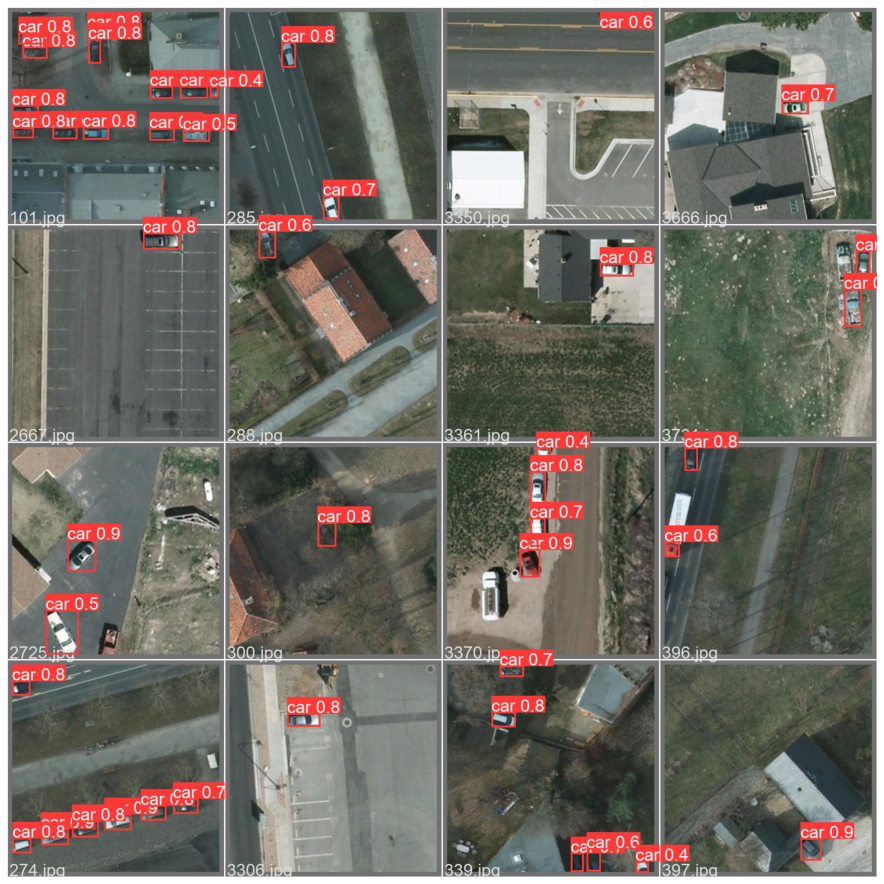

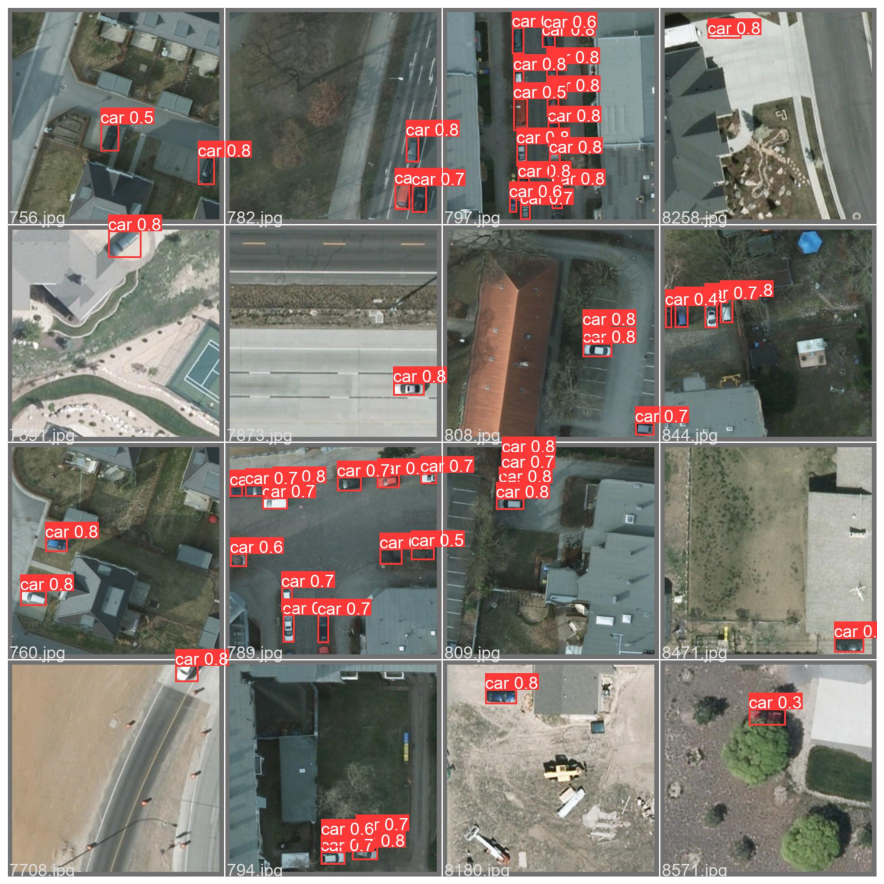

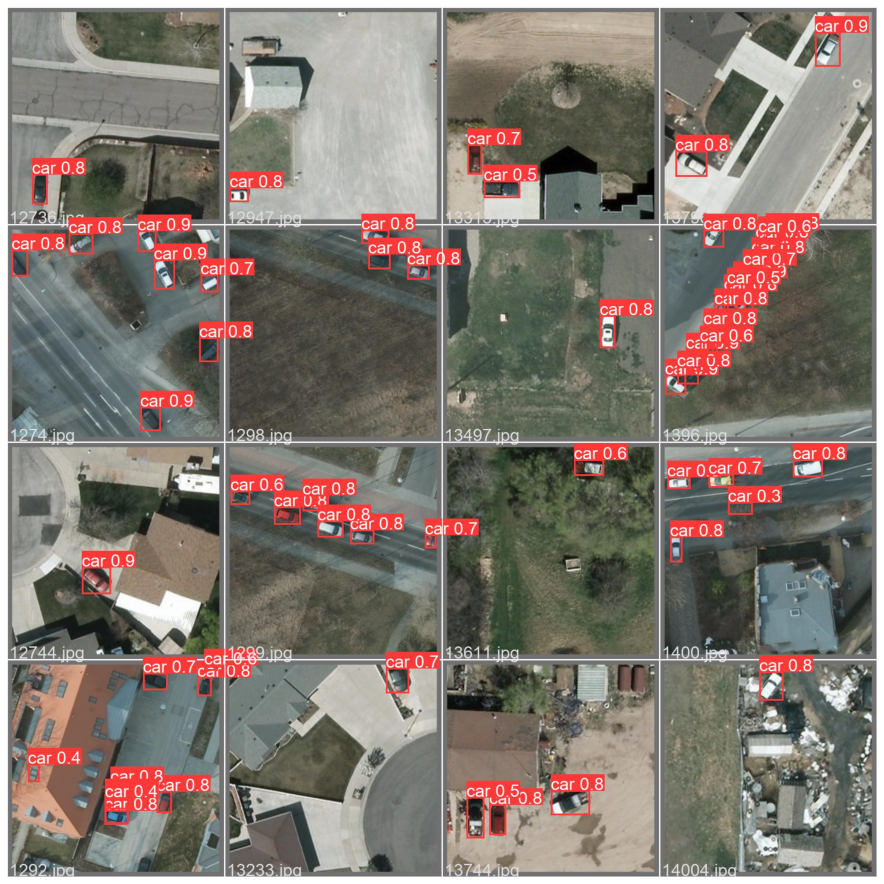

In [ ]:
show_valid_results(RES_DIR)

get diagrams of loss , ... changes during training

['runs/train/results_4/results.png']


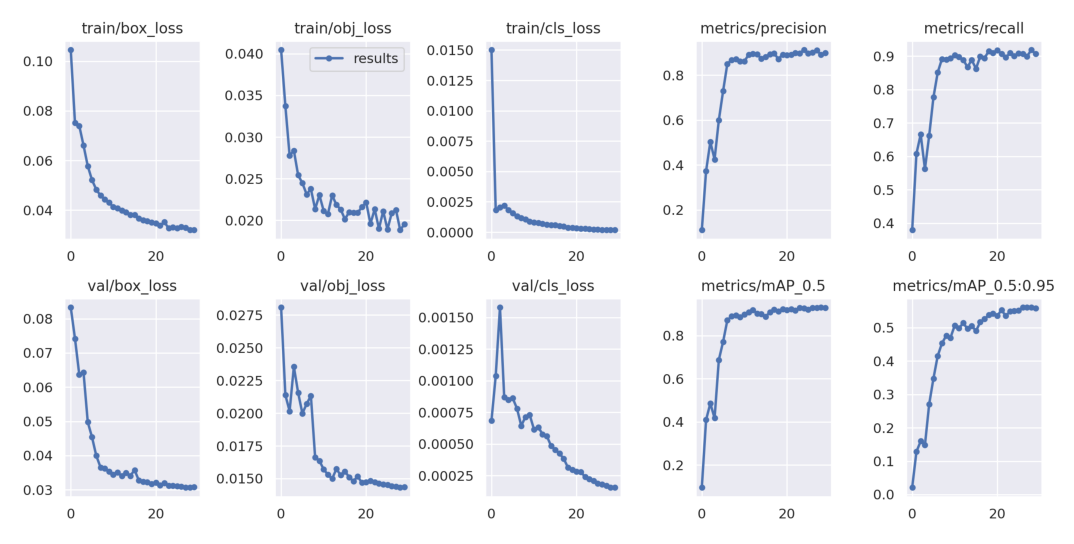

In [ ]:
visualize('results_4' , ['results.png'] )

## training nano model with freezing some layers

In [ ]:
RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --data ../data.yaml --weights yolov5n.pt \
    --img 640 --epochs 20 --batch-size 32 --name {RES_DIR} \
    --freeze 0 1 2 3 4 5 6 7 8 9 10 

Current number of result directories: 4
results_5
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
git: 'Notebooks/YOLOV5/yolov5' is not a git command. See 'git --help'.
YOLOv5 🚀 2022-8-16 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=

## training nano model with decreasing image size

**let's reduce image size and see how does effects on our training performance**

In [ ]:
TRAIN = True
RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --data ../data.yaml --weights yolov5n.pt \
    --img 224 --epochs 10 --batch-size 32 --name {RES_DIR}

Current number of result directories: 5
results_6
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 14 (delta 11), reused 10 (delta 7), pack-reused 0
Unpacking objects: 100% (14/14), done.
From https://github.com/ultralytics/yolov5
   b26129b..01806e3  classifier -> origin/classifier
github: up to date with h

**as we can see above, decreasing image size reduced model performance but decreased gpu memry usage and training time**